In [44]:
import pandas as pd

#下载https://www.kaggle.com/datasets/aryansingh0909/nyt-articles-21m-2000-present
# Kaggle中的这个数据是通过 https://developer.nytimes.com/apis 获取的
df = pd.read_csv('nyt-metadata.csv')
df.dropna(subset=['headline', 'byline', 'multimedia', 'keywords'], inplace=True)
df

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,Article on upcoming New York Giants-Dallas Cow...,https://www.nytimes.com/2000/01/01/sports/pro-...,Article on upcoming New York Giants-Dallas Cow...,Waiting in the visiting locker room at Texas S...,D,2.0,The New York Times,[],"{'main': 'Playoffs or No, Dallas Provides The ...","[{'name': 'organizations', 'value': 'New York ...",2000-01-01 05:00:00+00:00,article,Sports Desk,Sports,"{'original': 'By Bill Pennington', 'person': [...",News,nyt://article/01111a48-3502-5021-8096-bc929379...,819.0,nyt://article/01111a48-3502-5021-8096-bc929379...,NaN
1,Jeanne C Pond letter expresses hope that spiri...,https://www.nytimes.com/2000/01/01/opinion/l-o...,Jeanne C Pond letter expresses hope that spiri...,To the Editor:,A,30.0,The New York Times,[],"{'main': 'On This First Day, a Fanfare for the...","[{'name': 'persons', 'value': 'Pond, Jeanne C'...",2000-01-01 05:00:00+00:00,article,Editorial Desk,Opinion,"{'original': '', 'person': [], 'organization':...",Letter,nyt://article/02328edc-dad1-5eb0-900e-917162e4...,122.0,nyt://article/02328edc-dad1-5eb0-900e-917162e4...,NaN
2,Many experts on Y2K computer problem report th...,https://www.nytimes.com/2000/01/01/us/1-1-00-t...,Many experts on Y2K computer problem report th...,As the world slid nervously yesterday through ...,A,10.0,The New York Times,[],"{'main': ""Internet's Cheering Squad Nervously ...","[{'name': 'subject', 'value': 'Electronic Mail...",2000-01-01 05:00:00+00:00,article,National Desk,U.S.,"{'original': 'By Barnaby J. Feder', 'person': ...",News,nyt://article/02a8f89b-153f-5b84-983c-e328de5b...,761.0,nyt://article/02a8f89b-153f-5b84-983c-e328de5b...,NaN
3,WILL the forces of globalism continue to push ...,https://www.nytimes.com/2000/01/01/news/vision...,NaN,WILL the forces of globalism continue to push ...,E,4.0,The New York Times,[],{'main': 'Economic Thinking Finds a Free Marke...,[],2000-01-01 05:00:00+00:00,article,The Millennium,Archives,"{'original': 'By Floyd Norris', 'person': [{'f...",News,nyt://article/0634d837-97b8-59b5-aa17-f90d1a89...,916.0,nyt://article/0634d837-97b8-59b5-aa17-f90d1a89...,NaN
4,SPECIAL TODAY The Millennium Envisioning th...,https://www.nytimes.com/2000/01/01/nyregion/in...,NaN,SPECIAL TODAY,A,1.0,The New York Times,[],"{'main': 'INSIDE', 'kicker': None, 'content_ki...",[],2000-01-01 05:00:00+00:00,article,Metropolitan Desk,New York,"{'original': '', 'person': [], 'organization':...",Summary,nyt://article/0654cc64-c37f-594d-9290-1ce578cd...,102.0,nyt://article/0654cc64-c37f-594d-9290-1ce578cd...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191512,"Gov. Maura Healey, lamenting the decision, cal...",https://www.nytimes.com/2025/02/28/us/pink-hou...,"Gov. Maura Healey, lamenting the decision, cal...",A battered pink house on the coast of Massachu...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Despite Efforts to Save It, a Belove...","[{'name': 'subject', 'value': 'Demolition', 'r...",2025-03-01 00:17:47+00:00,article,National,U.S.,"{'original': 'By Jenna Russell', 'person': [{'...",News,nyt://article/b64c7a63-77cf-52f6-b867-8a77cff9...,629.0,nyt://article/b64c7a63-77cf-52f6-b867-8a77cff9...,NaN
2191513,"The statements piled up on social media, offer...",https://www.nytimes.com/2025/02/28/us/politics...,"The statements piled up on social media, offer...",European leaders quickly pledged their continu...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Europe Rallies Around Zelensky After...,"[{'name': 'subject', 'value': 'United States P...",2025-03-01 00:18:14+00:00,article,Washington,U.S.,"{'original': 'By Tim Balk', 'person': [{'first...",News,nyt://article/46fe3077-63a0-5754-abed-ea525486...,763.0,nyt://article/

In [50]:
def title(text):
    try:
        return eval(text)['main']
    except:
        return ''

df['titile'] = df.headline.apply(title)

def author(text):
    try:
        return eval(text)['original']
    except:
        return ''

df['author'] = df.byline.apply(author)



def img_url(text):
    try:
        return 'https://www.nytimes.com/'+ eval(text)[0]['url']
    except:
        return ''
        
df['img_url'] = df.multimedia.apply(img_url)


def keywords(text):
    try:
        return '|'.join([d['value'] for d in eval(text)])
    except:
        return ''
    

df['Keywords'] = df.keywords.apply(keywords)

In [98]:
df2 = df[['titile', 'pub_date', 'section_name', 'subsection_name', 
 'author', 'abstract', 'lead_paragraph', 'Keywords',
 'img_url', 'web_url']]

df2.columns = ['title', 'pub_date', 'section', 'subsection', 
 'author', 'abstract', 'lead_paragraph', 'keywords',
 'img_url', 'web_url']

df2

,title,pub_date,section,subsection,author,abstract,lead_paragraph,keywords,img_url,web_url
0,"Playoffs or No, Dallas Provides The Motivation",2000-01-01 05:00:00+00:00,Sports,NaN,By Bill Pennington,Article on upcoming New York Giants-Dallas Cow...,Waiting in the visiting locker room at Texas S...,New York Giants|Dallas Cowboys|Football,,https://www.nytimes.com/2000/01/01/sports/pro-...
1,"On This First Day, a Fanfare for the New Era; ...",2000-01-01 05:00:00+00:00,Opinion,NaN,,Jeanne C Pond letter expresses hope that spiri...,To the Editor:,"Pond, Jeanne C|TWO THOUSAND (YEAR)",,https://www.nytimes.com/2000/01/01/opinion/l-o...
2,Internet's Cheering Squad Nervously Watches Clock,2000-01-01 05:00:00+00:00,U.S.,NaN,By Barnaby J. Feder,Many experts on Y2K computer problem report th...,As the world slid nervously yesterday through ...,Electronic Mail|COMPUTER SOFTWARE|TWO THOUSAND...,,https://www.nytimes.com/2000/01/01/us/1-1-00-t...
3,Economic Thinking Finds a Free Market,2000-01-01 05:00:00+00:00,Archives,NaN,By Floyd Norris,WILL the forces of globalism continue to push ...,WILL the forces of globalism continue to push ...,,,https://www.nytimes.com/2000/01/01/news/vision...
4,INSIDE,2000-01-01 05:00:00+00:00,New York,NaN,,SPECIAL TODAY The Millennium Envisioning th...,SPECIAL TODAY,,,https://www.nytimes.com/2000/01/01/nyregion/in...
...,...,...,...,...,...,...,...,...,...,...
2191512,"Despite Efforts to Save It, a Beloved Pink Hou...",2025-03-01 00:17:47+00:00,U.S.,NaN,By Jenna Russell,"Gov. Maura Healey, lamenting the decision, cal...",A battered pink house on the coast of Massachu...,Demolition|Historic Buildings and Sites|Wildli...,https://www.nytimes.com/images/2025/02/28/mult...,https://www.nytimes.com/2025/02/28/us/pink-hou...
2191513,Europe Rallies Around Zelensky After Explosive...,2025-03-01 00:18:14+00:00,U.S.,Politics,By Tim Balk,"The statements piled up on social media, offer...",European leaders quickly pledged their continu...,United States Politics and Government|Russian ...,https://www.nytimes.com/images/2025/02/28/mult...,https://www.nytimes.com/2025/02/28/us/politics...
2191514,Putin Is Ready to Carve Up the World. Trump Ju...,2025-03-01 00:36:22+00:00,Opinion,NaN,By M. Gessen,The talks about Ukraine were never just about ...,Washington and Moscow have been repairing rela...,"Russian Invasion of Ukraine (2022)|Putin, Vlad...",https://www.nytimes.com/images/2025/02/28/opin...,https://www.nytimes.com/2025/02/28/opinion/put...
2191515,Ukrainians Blindsided by Deal’s Breakdown and ...,2025-03-01 00:36:53+00:00,World,Europe,By Kim Barker and Oleksandra Mykolyshyn,Some said they felt the U.S. president was dis...,Liudmyla Shestakova has lost a lot to this war...,Russian Invasion of Ukraine (2022)|United Stat...,https://www.nytimes.com/images/2025/02/28/mult...,https://www.nytimes.com/2025/02/28/world/europ...


In [73]:
df2['pub_date']

0          2000-01-01 05:00:00+00:00
1          2000-01-01 05:00:00+00:00
2          2000-01-01 05:00:00+00:00
3          2000-01-01 05:00:00+00:00
4          2000-01-01 05:00:00+00:00
                     ...            
2191512    2025-03-01 00:17:47+00:00
2191513    2025-03-01 00:18:14+00:00
2191514    2025-03-01 00:36:22+00:00
2191515    2025-03-01 00:36:53+00:00
2191516    2025-03-01 00:39:55+00:00
Name: pub_date, Length: 2191516, dtype: object

In [82]:
df2['pub_date'] = pd.to_datetime(df2['pub_date'].apply(lambda k: k[:19]))

/var/folders/y0/4gqxky0s2t94x1c1qhlwr6100000gn/T/ipykernel_81209/3129815856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pub_date'] = pd.to_datetime(df2['pub_date'].apply(lambda k: k[:19]))


In [86]:
print(df2['pub_date'].min(), df2['pub_date'].max())

2000-01-01 05:00:00 2025-03-01 00:39:55


In [89]:
df2

'https://www.nytimes.com/2025/02/28/us/politics/judge-musk-doge.html'

In [108]:
df.to_csv('纽约时报新闻数据集.csv.gz', index=False, compression='gzip')

In [109]:
import pandas as pd

df = pd.read_csv('纽约时报新闻数据集.csv.gz')
df

/var/folders/y0/4gqxky0s2t94x1c1qhlwr6100000gn/T/ipykernel_81209/492634221.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


,title,pub_date,section,subsection,author,abstract,lead_paragraph,keywords,img_url,web_url
0,"Playoffs or No, Dallas Provides The Motivation",2000-01-01 05:00:00+00:00,Sports,NaN,By Bill Pennington,Article on upcoming New York Giants-Dallas Cow...,Waiting in the visiting locker room at Texas S...,New York Giants|Dallas Cowboys|Football,NaN,https://www.nytimes.com/2000/01/01/sports/pro-...
1,"On This First Day, a Fanfare for the New Era; ...",2000-01-01 05:00:00+00:00,Opinion,NaN,NaN,Jeanne C Pond letter expresses hope that spiri...,To the Editor:,"Pond, Jeanne C|TWO THOUSAND (YEAR)",NaN,https://www.nytimes.com/2000/01/01/opinion/l-o...
2,Internet's Cheering Squad Nervously Watches Clock,2000-01-01 05:00:00+00:00,U.S.,NaN,By Barnaby J. Feder,Many experts on Y2K computer problem report th...,As the world slid nervously yesterday through ...,Electronic Mail|COMPUTER SOFTWARE|TWO THOUSAND...,NaN,https://www.nytimes.com/2000/01/01/us/1-1-00-t...
3,Economic Thinking Finds a Free Market,2000-01-01 05:00:00+00:00,Archives,NaN,By Floyd Norris,WILL the forces of globalism continue to push ...,WILL the forces of globalism continue to push ...,NaN,NaN,https://www.nytimes.com/2000/01/01/news/vision...
4,INSIDE,2000-01-01 05:00:00+00:00,New York,NaN,NaN,SPECIAL TODAY The Millennium Envisioning th...,SPECIAL TODAY,NaN,NaN,https://www.nytimes.com/2000/01/01/nyregion/in...
...,...,...,...,...,...,...,...,...,...,...
2191510,"Despite Efforts to Save It, a Beloved Pink Hou...",2025-03-01 00:17:47+00:00,U.S.,NaN,By Jenna Russell,"Gov. Maura Healey, lamenting the decision, cal...",A battered pink house on the coast of Massachu...,Demolition|Historic Buildings and Sites|Wildli...,https://www.nytimes.com/images/2025/02/28/mult...,https://www.nytimes.com/2025/02/28/us/pink-hou...
2191511,Europe Rallies Around Zelensky After Explosive...,2025-03-01 00:18:14+00:00,U.S.,Politics,By Tim Balk,"The statements piled up on social media, offer...",European leaders quickly pledged their continu...,United States Politics and Government|Russian ...,https://www.nytimes.com/images/2025/02/28/mult...,https://www.nytimes.com/2025/02/28/us/politics...
2191512,Putin Is Ready to Carve Up the World. Trump Ju...,2025-03-01 00:36:22+00:00,Opinion,NaN,By M. Gessen,The talks about Ukraine were never just about ...,Washington and Moscow have been repairing rela...,"Russian Invasion of Ukraine (2022)|Putin, Vlad...",https://www.nytimes.com/images/2025/02/28/opin...,https://www.nytimes.com/2025/02/28/opinion/put...
2191513,Ukrainians Blindsided by Deal’s Breakdown and ...,2025-03-01 00:36:53+00:00,World,Europe,By Kim Barker and Oleksandra Mykolyshyn,Some said they felt the U.S. president was dis...,Liudmyla Shestakova has lost a lot to this war...,Russian Invasion of Ukraine (2022)|United Stat...,https://www.nytimes.com/images/2025/02/28/mult...,https://www.nytimes.com/2025/02/28/world/europ...


In [112]:
df2.dtypes

title             object
pub_date          object
section           object
subsection        object
author            object
abstract          object
lead_paragraph    object
keywords          object
img_url           object
web_url           object
dtype: object

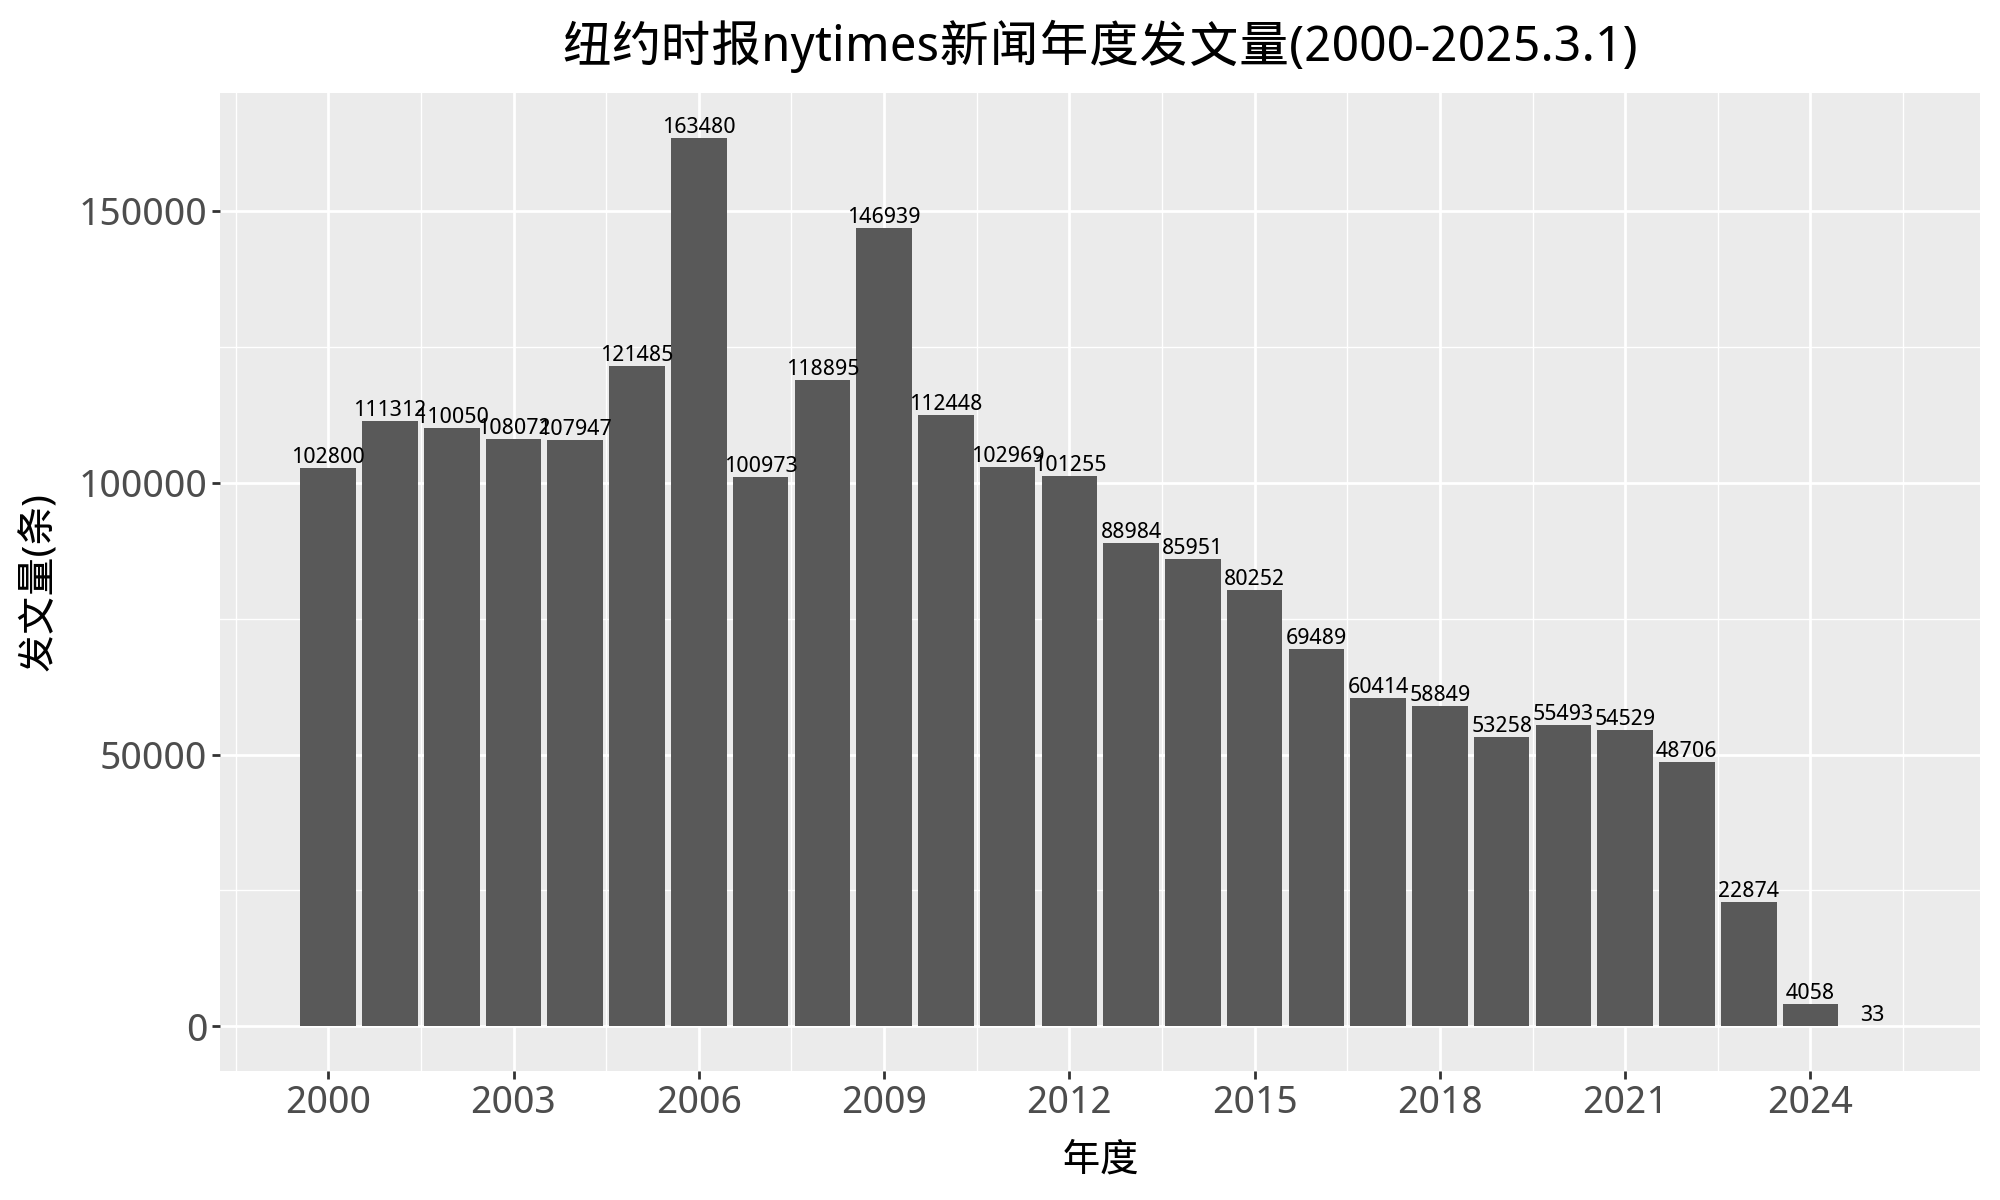

In [113]:

from plotnine import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#文泉驿微米黑.ttf位于代码同文件夹
font_prop = FontProperties(fname='文泉驿微米黑.ttf') 


volumes = []
df['pub_date'] = pd.to_datetime(df['pub_date'])
df2 = df.set_index('pub_date')
for date, y_df in df2.groupby(pd.Grouper(freq='YE')):
    volumes.append(len(y_df))

data = pd.DataFrame({'year': range(2000, 2026), 
                     'volume': volumes})


(
    ggplot(data,  aes(x='year', y='volume'))
    +geom_bar(stat='identity')
    +labs(title='纽约时报nytimes新闻年度发文量(2000-2025.3.1)',
          x = '年度', 
          y = '发文量(条)')
    +geom_text(aes(label='volume'),  # 添加数据标签
               va='bottom',           # 垂直对齐方式为底部（即在柱子顶部）
               size=8,                # 设置字体大小
               format_string='{}')     # 格式化字符串
    +theme(figure_size=(10, 6),
           text = element_text(family = font_prop.get_name(), size=14), 
           plot_title = element_text(family = font_prop.get_name(), size=18)
          )
    +scale_x_continuous(breaks=range(2000, 2026, 3)) 

)

In [92]:
len(df2)

2191515

In [96]:
for col in df2.columns:
    print(f' - {col}')

 - title
 - pub_date
 - section_name
 - subsection_name
 - author
 - abstract
 - lead_paragraph
 - keywords
 - img_url
 - web_url
 - word_count


In [114]:
df['pub_date'] = pd.to_datetime(df['pub_date'])

print('覆盖日期:', df['pub_date'].min(), '~' ,df['pub_date'].max())


覆盖日期: 2000-01-01 05:00:00+00:00 ~ 2025-03-01 00:39:55+00:00
